## Clase 13 - Taller Aplicado de Series de Tiempo

In [ ]:
install.packages("forecast")
install.packages("rio")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
Data <- rio::import("IMACEC_PIB.xlsx")
head(Data)

,AÑO,MES,IMACEC_NM,PIB_NM,DATA
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2002,12,53.02988,84475.22,desarrollo
2,2003,1,50.14290,84811.74,desarrollo
3,2003,2,47.80895,85149.61,desarrollo
4,2003,3,53.40415,85488.82,desarrollo
5,2003,4,52.61135,85829.39,desarrollo
6,2003,5,51.88808,86171.31,desarrollo


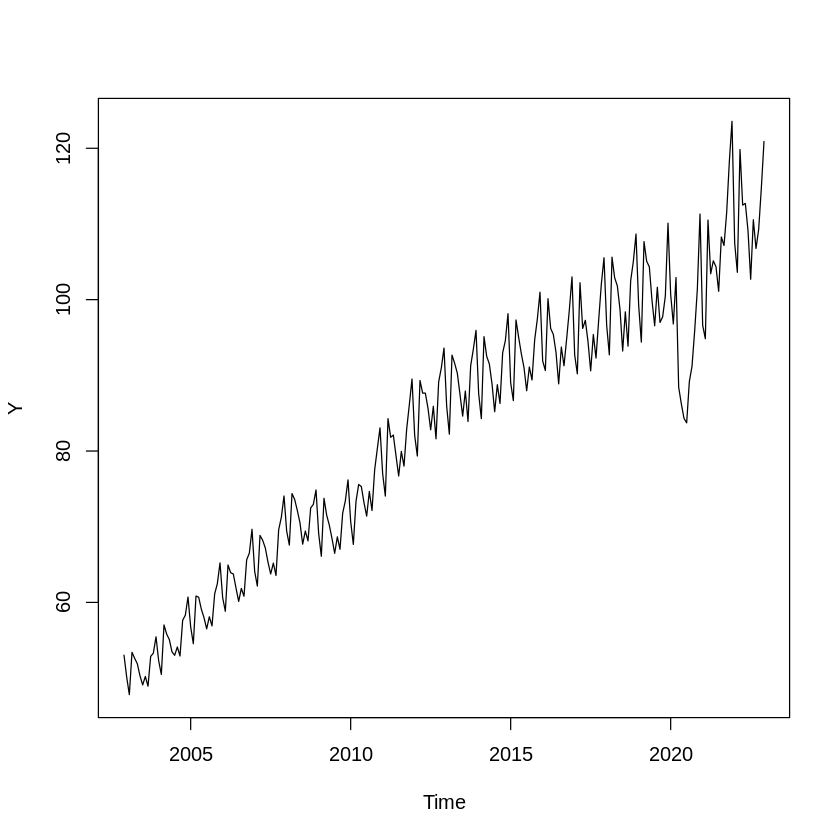

In [ ]:
Y <- ts(Data$IMACEC_NM[Data$DATA == "desarrollo"], start = c(2002,12), frequency = 12)
plot(Y)

Transformacion der Box-Cox: forecast::BoxCox(...) y forecast::BoxCox.lambda(...)

In [ ]:
forecast::BoxCox.lambda(Y, method = "guerrero")
forecast::BoxCox.lambda(Y, method = "loglik")

In [ ]:
lambda <- forecast::BoxCox.lambda(Y, method = "loglik")
plot(forecast::BoxCox(Y, lambda = lambda))

In [ ]:
lambda <- forecast::BoxCox.lambda(Y, method = "guerrero")
plot(forecast::BoxCox(Y, lambda = lambda))

Entre las dos propuestas, se observa un mejor desempeño del método guerrero

In [ ]:
lambda <- forecast::BoxCox.lambda(Y, method = "guerrero")

## Modelo SARIMA

Modelo SARIMA(p,d,q)(P,D,Q)S
¿Que valores de integración toman d y D?

Utilicemos las funciones
forecast::ndiffs(...) y forecast::nsdiffs(...)


In [ ]:
d <- forecast::ndiffs(Y)
D <- forecast::nsdiffs(Y)
d
D

[1] 1

[1] 1

Vamos a perdir a auto.arima(...) una propuesta prelimina

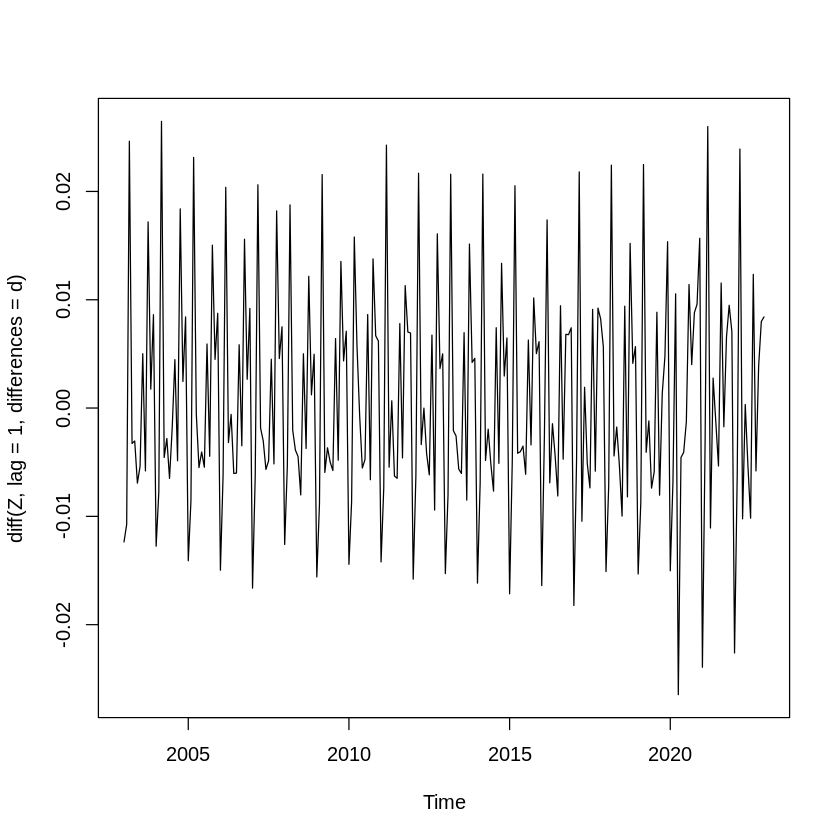

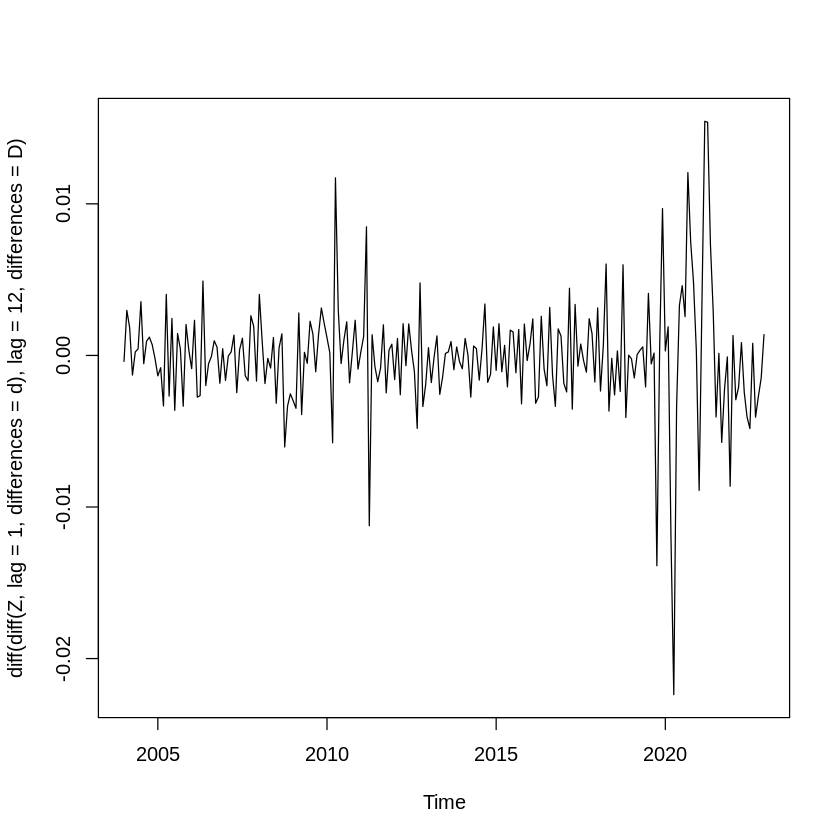

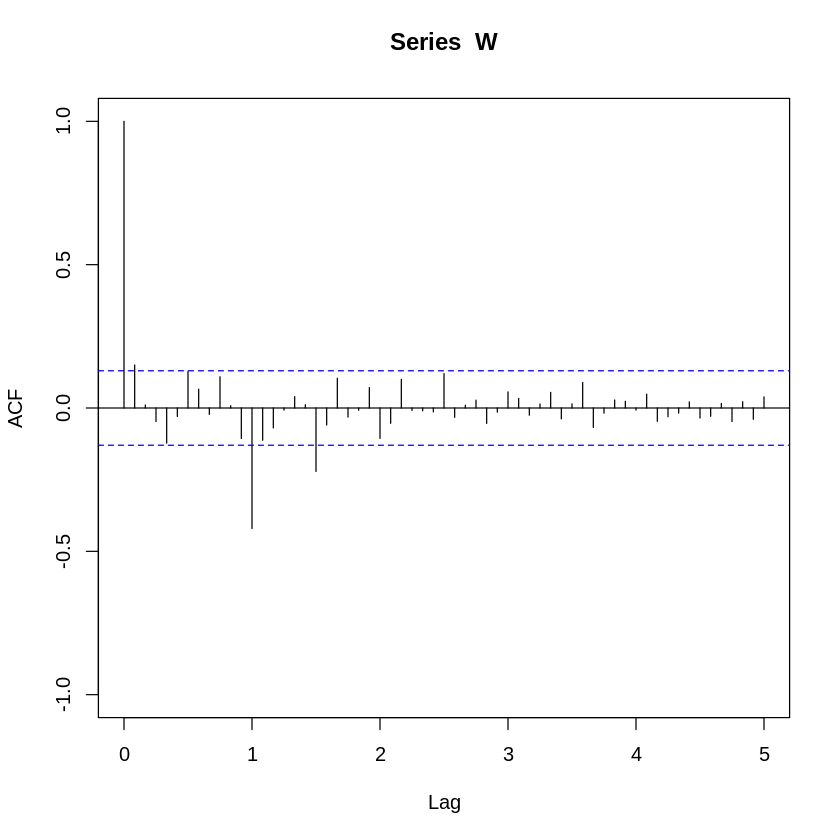

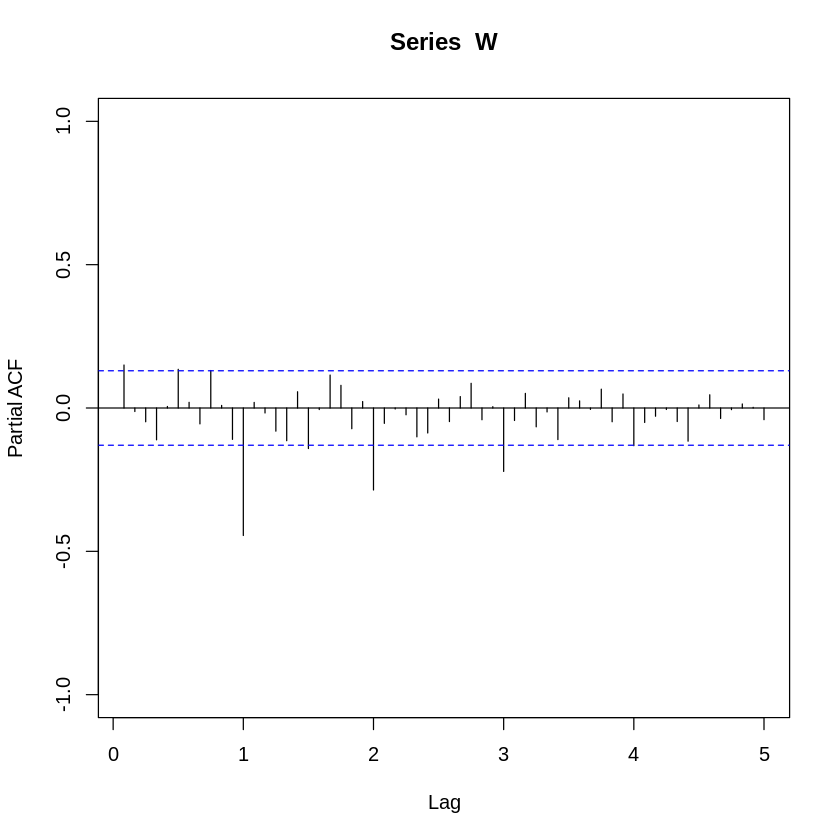

In [ ]:
Z <- forecast::BoxCox(Y, lambda = lambda)
plot(diff(Z, lag = 1, differences = d))
plot(diff(diff(Z, lag = 1, differences = d), lag = 12, differences = D))
W <- diff(diff(Z, lag = 1, differences = d), lag = 12, differences = D)
acf(W, lag.max = 60, ylim = c(-1,+1))
pacf(W, lag.max = 60, ylim = c(-1,+1))

ACF: nos entrega valores parra q y Q
PACF: entrega valores para p y P

p = 6
q = 6
Q = 1
P = 4

Vamos a ajustar el auto.arima

In [ ]:
fit <- forecast::auto.arima(Y, lambda = lambda, d = 1, D = 1, max.p = 6, max.q = 6, max.P = 4, max.Q = 1)

In [ ]:
fit

Series: Y 
ARIMA(0,1,0)(0,1,1)[12] 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         sma1
      -0.6835
s.e.   0.0471

sigma^2 = 9.833e-06:  log likelihood = 990.35
AIC=-1976.7   AICc=-1976.65   BIC=-1969.84

Vamos hacer un diagnosticos el este modelo

In [ ]:
source("TS.diag.R")
source("summary.arima.R")
source("salida.arima.R")

In [ ]:
salida.arima(Y, fit)

Series: Y 
ARIMA(0,1,0)(0,1,1)[12] 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         sma1
      -0.6835
s.e.   0.0471

sigma^2 = 9.833e-06:  log likelihood = 990.35
AIC=-1976.7   AICc=-1976.65   BIC=-1969.84

Training set error measures:
                      ME     RMSE       MAE         MPE     MAPE     MASE
Training set -0.06492983 1.617852 0.9754629 -0.08554647 1.100644 0.230957
                   ACF1
Training set 0.09316783
 
  
  Adjusted R-squared
          0.9918902
 
      Estimate Std. Error  z value Pr(>|z|)
sma1  -0.6835     0.0471 -14.4968        0

 Residuals: 
         Kolmogorov-Smirnov test Breusch-Pagan test
p-value              0.02360568         0.00216275


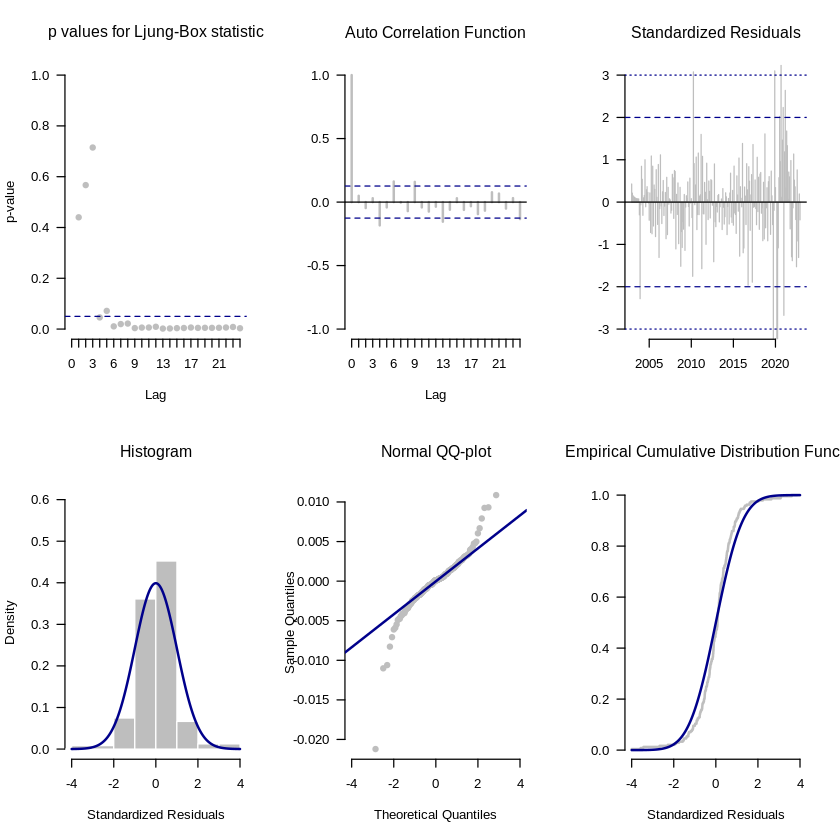

In [ ]:
TS.diag(fit$residuals)

Vamos "a mejorar" incorporando ma4 y ma6 al modelo propuesto por auto.arima(...)

In [ ]:
fixed = c(NA,NA,NA,NA,NA,NA,NA)
fit <- forecast::Arima(Y, lambda = lambda, order = c(0,1,6), seasonal = c(0,1,1), fixed = fixed)
fit
fixed = c(0,0,0,NA,0,NA,NA)
fit <- forecast::Arima(Y, lambda = lambda, order = c(0,1,6), seasonal = c(0,1,1), fixed = fixed)
fit

Series: Y 
ARIMA(0,1,6)(0,1,1)[12] 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         ma1     ma2     ma3      ma4     ma5     ma6     sma1
      0.0398  0.0099  0.0300  -0.2256  0.0191  0.1551  -0.7112
s.e.  0.0664  0.0663  0.0672   0.0691  0.0730  0.0664   0.0508

sigma^2 = 9.318e-06:  log likelihood = 998.98
AIC=-1981.96   AICc=-1981.3   BIC=-1954.52

Series: Y 
ARIMA(0,1,6)(0,1,1)[12] 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
      ma1  ma2  ma3      ma4  ma5     ma6     sma1
        0    0    0  -0.2154    0  0.1674  -0.7153
s.e.    0    0    0   0.0691    0  0.0666   0.0486

sigma^2 = 9.174e-06:  log likelihood = 998.63
AIC=-1989.26   AICc=-1989.09   BIC=-1975.55

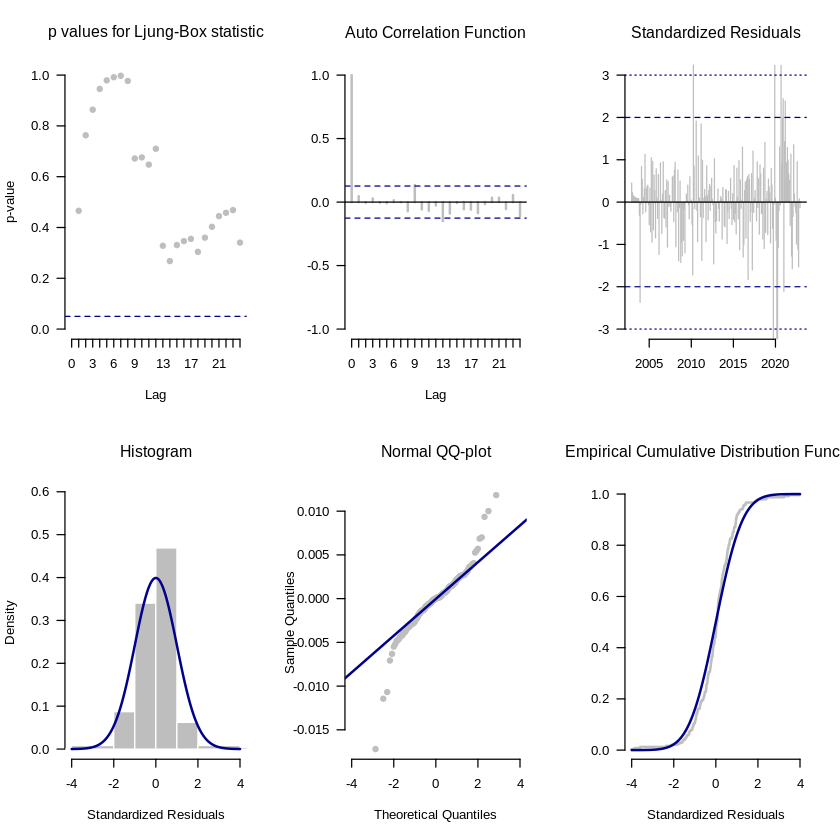

In [ ]:
TS.diag(fit$residuals)

In [ ]:
salida.arima(Y, fit, fixed)

Series: Y 
ARIMA(0,1,6)(0,1,1)[12] 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
      ma1  ma2  ma3      ma4  ma5     ma6     sma1
        0    0    0  -0.2154    0  0.1674  -0.7153
s.e.    0    0    0   0.0691    0  0.0666   0.0486

sigma^2 = 9.174e-06:  log likelihood = 998.63
AIC=-1989.26   AICc=-1989.09   BIC=-1975.55

Training set error measures:
                      ME     RMSE       MAE         MPE     MAPE      MASE
Training set -0.06910184 1.543356 0.9555837 -0.09154089 1.081501 0.2262503
                 ACF1
Training set 0.102085
 
  
  Adjusted R-squared
          0.9926228
 
      Estimate Std. Error  z value Pr(>|z|)
ma4   -0.2154     0.0691  -3.1174   0.0018
ma6    0.1674     0.0666   2.5147   0.0119
sma1  -0.7153     0.0486 -14.7191   0.0000

 Residuals: 
         Kolmogorov-Smirnov test Breusch-Pagan test
p-value              0.03361433       0.0009872086


Vamos a predecir los proximos 5 años (60 meses) utilizando forecas::forecast

In [ ]:
forecast::forecast(fit, h = 6, level = 0.95)

         Point Forecast     Lo 95    Hi 95
Jan 2023       107.5201 103.78238 111.4465
Feb 2023       104.7350  99.68655 110.1441
Mar 2023       118.9514 111.64857 126.9318
Apr 2023       110.7689 103.16830 119.1663
May 2023       110.4818 102.37500 119.5041
Jun 2023       107.5046  99.21690 116.7812

In [ ]:
Data[Data$AÑO == 2023,]

,AÑO,MES,IMACEC_NM,PIB_NM,DATA
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
242,2023,1,107.1972,188281.2,prediccion
243,2023,2,103.1111,188579.3,prediccion
244,2023,3,118.5913,188877.9,prediccion
245,2023,4,110.7069,189177.0,prediccion
246,2023,5,111.4772,189476.5,prediccion
247,2023,6,107.6817,189776.5,prediccion
248,2023,7,NA,190077.0,prediccion
249,2023,8,NA,190377.9,prediccion
250,2023,9,NA,190679.3,prediccion


In [ ]:
Data[Data$AÑO == 2022,]

,AÑO,MES,IMACEC_NM,PIB_NM,DATA
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
230,2022,1,107.4874,184916.3,desarrollo
231,2022,2,103.6112,185193.1,desarrollo
232,2022,3,119.8327,185470.2,desarrollo
233,2022,4,112.4916,185747.8,desarrollo
234,2022,5,112.7155,186025.8,desarrollo
235,2022,6,109.1184,186304.3,desarrollo
236,2022,7,102.6951,186583.1,desarrollo
237,2022,8,110.5584,186862.4,desarrollo
238,2022,9,106.7574,187142.0,desarrollo


In [ ]:
## Error porcentual de prediccion 2023.06
(107.5046/107.6817-1)*100

## Tasa de cecimiento anual real
(107.6817/109.1184-1)*100

## Tasa de cecimiento anual pronosticada
(107.5046/109.1184-1)*100

[1] -0.1644662

[1] -1.316643

[1] -1.478944

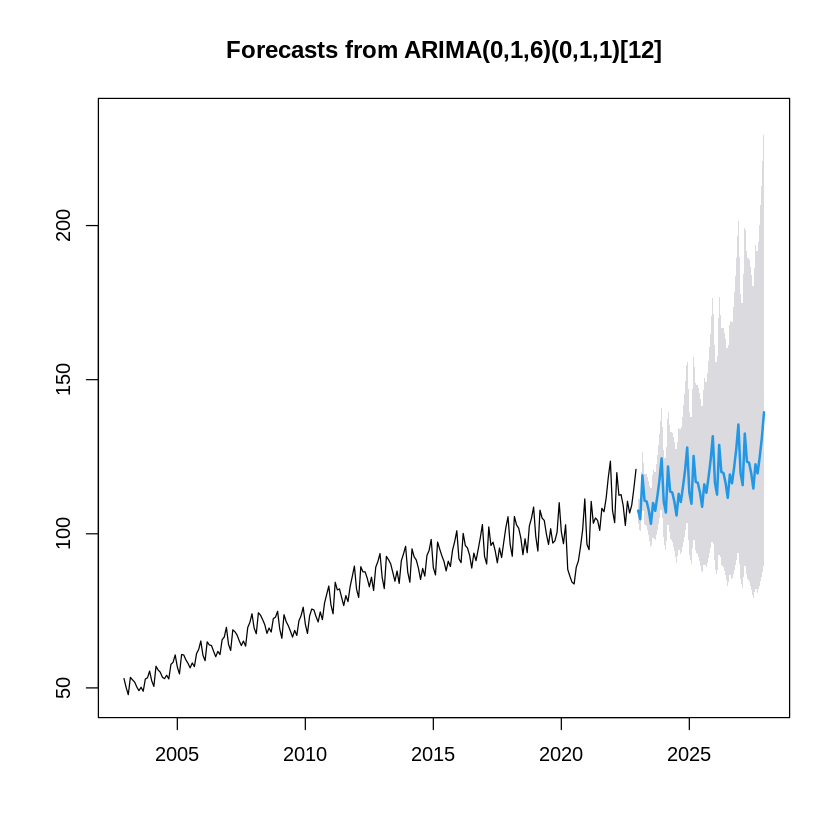

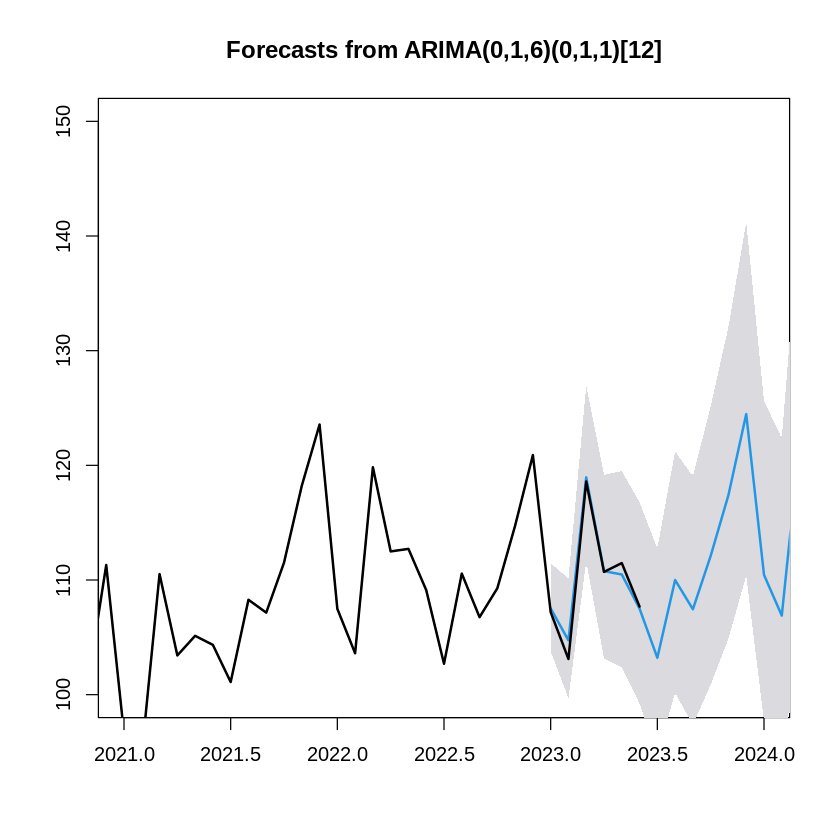

In [ ]:
pre <- forecast::forecast(fit, h = 60, level = 0.95)
plot(pre)
plot(pre, xlim = c(2021, 2024), ylim = c(100,150))
Y. <- ts(Data$IMACEC_NM, start = c(2002,12), frequency = 12)
lines(Y., lwd = 2)


## Modelo SARIMAX
Regresor: Pib tendencial

In [ ]:
xreg <- as.matrix(data.frame(Pib = Data$PIB_NM[Data$DATA == "desarrollo"]/1000000))
fit <- forecast::auto.arima(Y, lambda = lambda, xreg = xreg, d = 0, D = 1, max.p = 6, max.q = 6, max.P = 4, max.Q = 4)
salida.arima(Y, fit)

Series: Y 
Regression with ARIMA(1,0,0)(0,1,1)[12] errors 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         ar1     sma1     Pib
      0.9250  -0.6723  1.2978
s.e.  0.0342   0.0502  0.1997

sigma^2 = 9.627e-06:  log likelihood = 997.24
AIC=-1986.48   AICc=-1986.3   BIC=-1972.75

Training set error measures:
                    ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.0485587 1.590219 0.9821381 0.1113337 1.126425 0.2325375
                   ACF1
Training set 0.09703743
 
  
  Adjusted R-squared
          0.9921595
 
      Estimate Std. Error  z value Pr(>|z|)
ar1    0.9250     0.0342  27.0644        0
sma1  -0.6723     0.0502 -13.3913        0
Pib    1.2978     0.1997   6.4983        0

 Residuals: 
         Kolmogorov-Smirnov test Breusch-Pagan test
p-value              0.01780082       0.0005285133


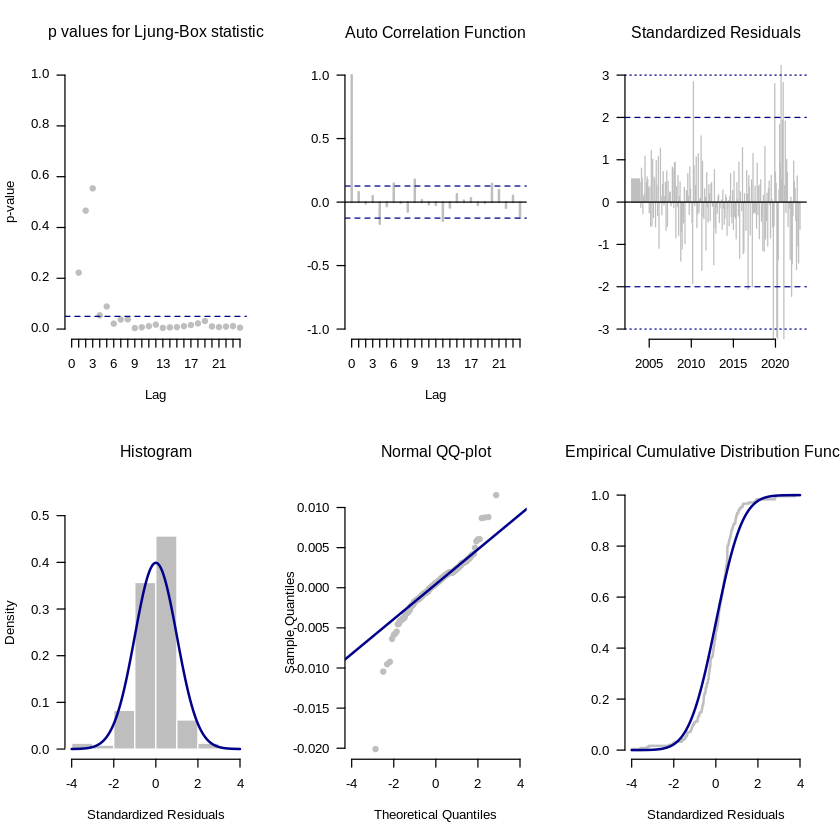

In [ ]:
TS.diag(fit$residuals)

Incorporemos ma4 y ma6

In [ ]:
fixed <- c(NA,NA,NA,NA,NA,NA,NA,NA,NA)
fit <- forecast::Arima(Y, lambda = lambda, xreg = xreg, order = c(1,0,6), seasonal = c(0,1,1), fixed = fixed)
fit
## Solo agregamos ma4 y ma6
fixed <- c(NA,0,0,0,NA,0,NA,NA,NA)
fit <- forecast::Arima(Y, lambda = lambda, xreg = xreg, order = c(1,0,6), seasonal = c(0,1,1), fixed = fixed)
fit

Series: Y 
Regression with ARIMA(1,0,6)(0,1,1)[12] errors 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         ar1     ma1     ma2     ma3      ma4      ma5     ma6     sma1     Pib
      0.9426  0.0493  0.0137  0.0174  -0.2507  -0.0056  0.1286  -0.6982  1.2633
s.e.  0.0695  0.0860  0.0876  0.0855   0.0883   0.0792  0.0688   0.0547  0.3190

sigma^2 = 9.152e-06:  log likelihood = 1005.62
AIC=-1991.23   AICc=-1990.22   BIC=-1956.89

Series: Y 
Regression with ARIMA(1,0,6)(0,1,1)[12] errors 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         ar1  ma1  ma2  ma3      ma4  ma5     ma6     sma1     Pib
      0.9740    0    0    0  -0.2695    0  0.1215  -0.7042  1.0474
s.e.  0.0498    0    0    0   0.0772    0  0.0699   0.0509  0.6382

sigma^2 = 8.999e-06:  log likelihood = 1005.45
AIC=-1998.9   AICc=-1998.52   BIC=-1978.29

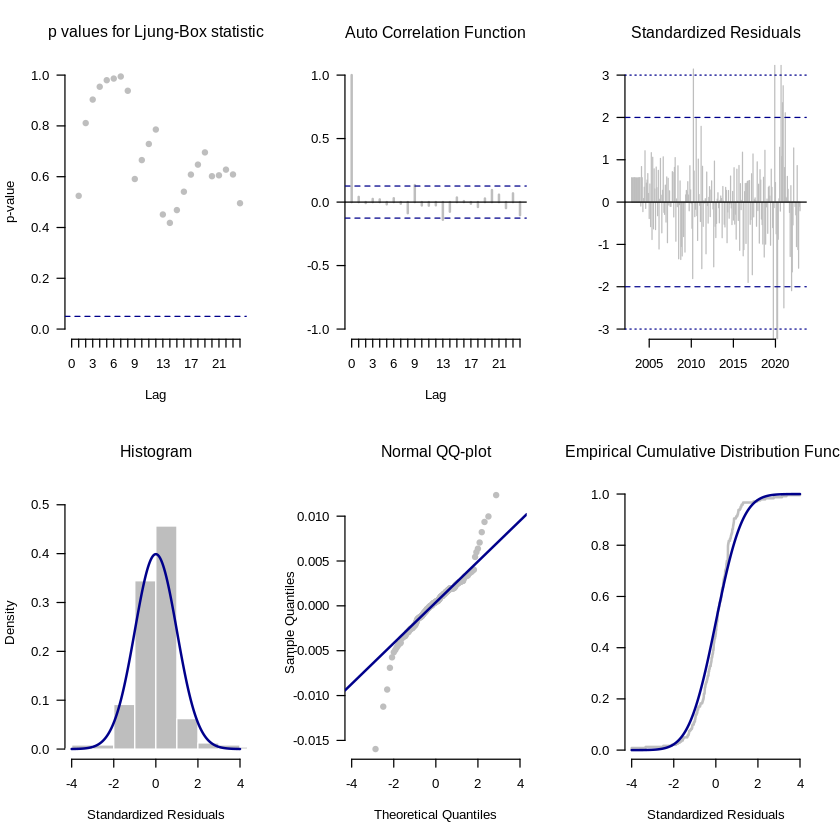

In [ ]:
TS.diag(fit$residuals)

In [ ]:
salida.arima(Y, fit, fixed)

Series: Y 
Regression with ARIMA(1,0,6)(0,1,1)[12] errors 
Box Cox transformation: lambda= -0.3830695 

Coefficients:
         ar1  ma1  ma2  ma3      ma4  ma5     ma6     sma1     Pib
      0.9740    0    0    0  -0.2695    0  0.1215  -0.7042  1.0474
s.e.  0.0498    0    0    0   0.0772    0  0.0699   0.0509  0.6382

sigma^2 = 8.999e-06:  log likelihood = 1005.45
AIC=-1998.9   AICc=-1998.52   BIC=-1978.29

Training set error measures:
                     ME     RMSE       MAE       MPE    MAPE      MASE
Training set 0.07183935 1.517381 0.9531012 0.1229848 1.09775 0.2256625
                   ACF1
Training set 0.07859607
 
  
  Adjusted R-squared
          0.9928707
 
      Estimate Std. Error  z value Pr(>|z|)
ar1    0.9740     0.0498  19.5704   0.0000
ma4   -0.2695     0.0772  -3.4907   0.0005
ma6    0.1215     0.0699   1.7388   0.0821
sma1  -0.7042     0.0509 -13.8425   0.0000
Pib    1.0474     0.6382   1.6413   0.1007

 Residuals: 
         Kolmogorov-Smirnov test Breusch-Pagan te

Vamos a Predecir

In [ ]:
newxreg <- as.matrix(data.frame(Pib = Data$PIB_NM[Data$DATA == "prediccion"]/1000000))
pre <- forecast::forecast(fit, xreg = newxreg, level = 0.95)

In [ ]:
pre$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,107.5943,104.8209,119.2080,111.0344,110.7211,107.7351,103.3751,110.1673,107.5769,112.0948,117.3712,124.3668
2024,110.3622,106.8613,121.9059,113.7448,113.4691,110.4445,105.9773,113.0583,110.4206,115.1557,120.6875,128.0190
2025,113.4675,109.8422,125.4999,117.0214,116.7473,113.6141,108.9816,116.3581,113.6261,118.5669,124.3427,132.0018
2026,116.8388,113.0682,129.3874,120.5523,120.2707,117.0103,112.1903,119.8767,117.0340,122.1866,128.2142,136.2136
2027,120.4035,116.4842,133.5204,124.3092,124.0264,120.6360,115.6200,123.6487,120.6930,126.0831,132.3930,140.7730


In [ ]:
(107.7351/107.6817-1)*100
(107.6817/109.1184-1)*100
(107.7351/109.1184-1)*100


[1] 0.0495906

[1] -1.316643

[1] -1.267706

In [ ]:
Y. <- ts(Data$IMACEC_NM, start = c(2002,12), frequency = 12)
mean(abs(pre$mean/Y.-1)*100, na.rm = T)

[1] 0.5953801